In [1]:
#California Housing Dataset
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
california=fetch_california_housing()
data=pd.DataFrame(california.data,columns=california.feature_names)
data['MedHouseVal']=california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
X=data.drop('MedHouseVal',axis=1)
y=data['MedHouseVal']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape



((16512, 8), (4128, 8), (16512,), (4128,))

In [7]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'Decision Tree':DecisionTreeRegressor(max_depth=5),
    'Random Forest':RandomForestRegressor(n_estimators=100),
}

results=pd.DataFrame(columns=['Model','MSE','MAE','R2 score'])
result1=[]
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    result1.append({
        'Model':model_name,
        'MSE':mse,
        'MAE':mae,
        'R2 score':r2
    })
results=pd.DataFrame(result1)
results

,Model,MSE,MAE,R2 score
0,Linear Regression,0.555892,0.533200,0.575788
1,Ridge Regression,0.555803,0.533204,0.575855
2,Lasso Regression,0.613512,0.581607,0.531817
3,Decision Tree,0.524515,0.522259,0.599732
4,Random Forest,0.252655,0.326873,0.807194


In [9]:
import pickle
# Example: Save the Random Forest model
best_model = models['Random Forest']
with open('california_price_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully as 'california_price_model.pkl'")

Model saved successfully as 'california_price_model.pkl'


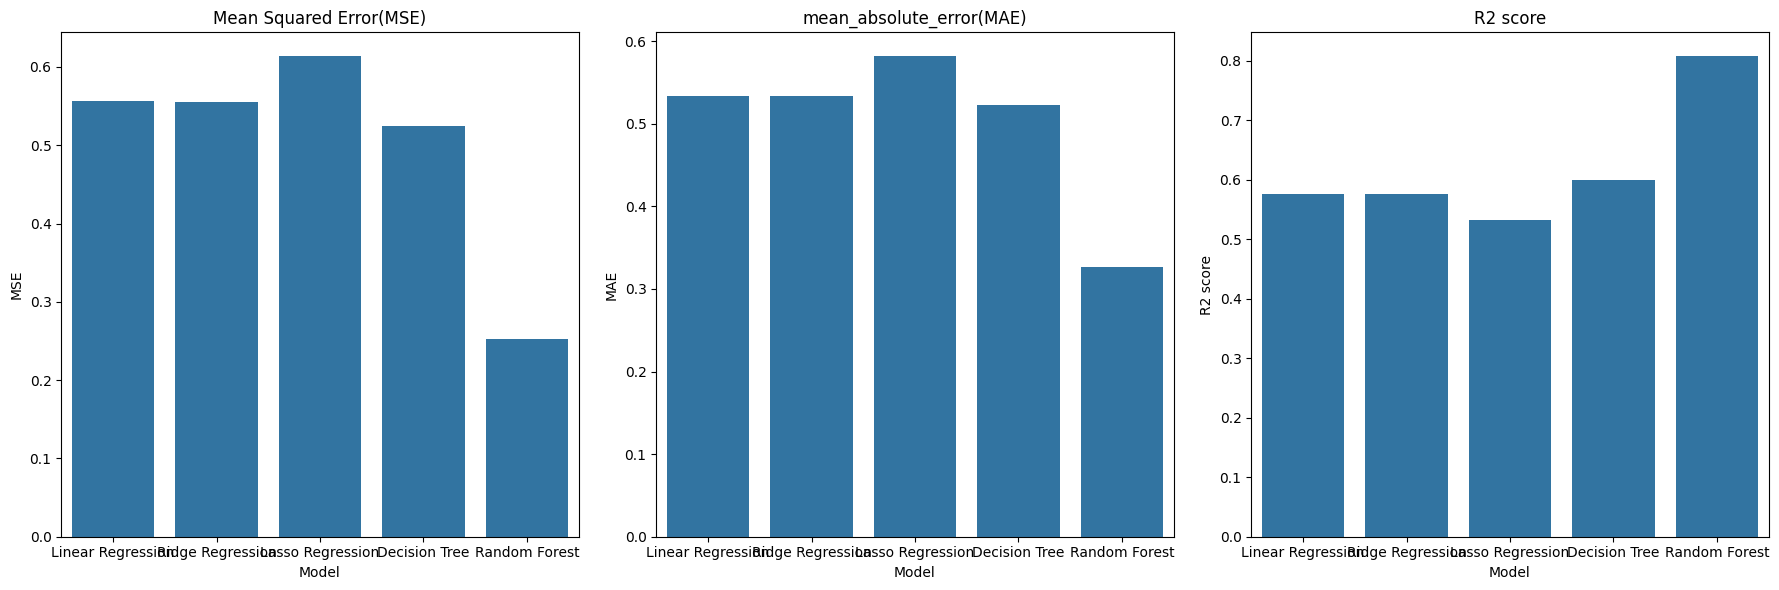

In [10]:

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
sns.barplot(x='Model',y='MSE',data=results,ax=axes[0])
axes[0].set_title('Mean Squared Error(MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

sns.barplot(x='Model',y='MAE',data=results,ax=axes[1])
axes[1].set_title('mean_absolute_error(MAE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MAE')

sns.barplot(x='Model',y='R2 score',data=results,ax=axes[2])
axes[2].set_title('R2 score')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R2 score')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import pickle

def predict_house_value(input_features):
    """
    Predicts median house value using the trained model.

    Parameters:
        input_features (list or array): A list or array of 8 numeric values in the order:
            [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]

    Returns:
        float: Predicted median house value
    """
    # Load the trained model
    with open(r'D:\Machine learning\california_housing\california_price_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Convert input to 2D array
    input_array = np.array(input_features).reshape(1, -1)

    # Predict
    prediction = model.predict(input_array)
    return prediction[0]

# Example usage
if __name__ == "__main__":
    # Input features: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
    sample_input = [8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]
    
    predicted_value = predict_house_value(sample_input)
    print(f"Predicted Median House Value: ${predicted_value:.2f}")


Predicted Median House Value: $4.19


c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
